##  Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re #Regular expression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [211]:
# Loading training_variants. Its a comma seperated file
data_variants = pd.read_csv(r'C:\Users\my pc\Desktop\datascience\all\training_variants.txt')
# Loading training_text dataset. This is seperated by ||
data_text = pd.read_csv(r'C:\Users\my pc\Desktop\datascience\all\training_text.txt',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

# Loading test_variants. Its a comma seperated file
test_variants = pd.read_csv(r'C:\Users\my pc\Desktop\datascience\all\test_variants.txt')
# Loading test_text dataset. This is seperated by ||
test_text = pd.read_csv(r'C:\Users\my pc\Desktop\datascience\all\test_text.txt',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)


In [3]:
print("Data Variant".ljust(15), data_variants.shape)
print("Data Text".ljust(15),data_text.shape)
print("Test Variant".ljust(15), test_variants.shape)
print("Test Text".ljust(15), test_text.shape)
data_variants.head()

Data Variant    (3321, 4)
Data Text       (3321, 2)
Test Variant    (5668, 3)
Test Text       (5668, 2)


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


## Her Kolon için tekillik sayısı kontrolü

In [5]:
print("Number of Unique ID", len(data_variants.ID.unique()))
print("Number of unique genes: ", len(data_variants.Gene.unique()))
print("Number of unique variations: ", len(data_variants.Variation.unique()))
print( "classes:",len(data_variants.Class.unique()) )

Number of Unique ID 3321
Number of unique genes:  264
Number of unique variations:  2996
classes: 9


In [5]:
data_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
data_variants.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [41]:
#Checking Information
data_variants.info()
# Checking dimention of data
data_variants.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   object
dtypes: int64(1), object(3)
memory usage: 103.9+ KB


(3321, 4)

## Text PreProcessing

In [468]:
stopwords=['a',
 'about',
'activity',
 'mutations',
 'cells',
 'cancers',     
 'above',
 'analysis',
'patients',
'patient',
'protein',
'proteins',
'role',        
'identified',
 'figure',         
 'after',
 'again',
 'against',
 'previously',          
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
'experiments',
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
'domain',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
'hotspot',
'human',         
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
'methods',
'method',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
'associated',
'described',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
'figure',
 'patients',          
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
'types',
 'under',
 'until',
 'protein', 
'expression',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
'expression',
'data',
'human',
'activity',
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves','1995']

def data_text_preprocess(total_text, ind, col):
    # Remove int values from text data as that might not be imp
    if type(total_text) is not int:
        string = ""
        # replacing all special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # replacing multiple spaces with single space
        total_text = re.sub('\s+',' ', str(total_text))
        # bring whole text to same lower-case scale.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from text
            if  word not in stopwords:
            #if len(word)>3 and word:
                string += word + " "
        
        data_text[col][ind] = string

In [469]:
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        data_text_preprocess(row['TEXT'], index, 'TEXT')

C:\Users\my pc\anaconda3\lib\site-packages\ipykernel_launcher.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Merging both gene_variations and text data based on ID

In [470]:
#merging both gene_variations and text data based on ID
def Merge_DF(maindf,seconddf):
    Data_full = pd.merge(maindf, seconddf,on='ID', how='left')
    return Data_full
    
Data_full=Merge_DF(data_variants,data_text)   
print(Data_full)

        ID    Gene             Variation  Class  \
0        0  FAM58A  Truncating Mutations      1   
1        1     CBL                 W802*      2   
2        2     CBL                 Q249E      2   
3        3     CBL                 N454D      3   
4        4     CBL                 L399V      4   
...    ...     ...                   ...    ...   
3316  3316   RUNX1                 D171N      4   
3317  3317   RUNX1                 A122*      1   
3318  3318   RUNX1               Fusions      1   
3319  3319   RUNX1                  R80C      4   
3320  3320   RUNX1                  K83E      4   

                                                   TEXT  
0     cyclin dependent kinases cdks regulate variety...  
1     abstract background small cell lung cancer nsc...  
2     abstract background small cell lung cancer nsc...  
3     recent evidence demonstrated acquired uniparen...  
4     oncogenic monomeric casitas lineage lymphoma g...  
...                                    

In [304]:
Data_full

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background small cell lung cancer nsc...
2,2,CBL,Q249E,2,abstract background small cell lung cancer nsc...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic monomeric casitas lineage lymphoma g...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,introduction myelodysplastic syndromes heterog...
3317,3317,RUNX1,A122*,1,introduction myelodysplastic syndromes heterog...
3318,3318,RUNX1,Fusions,1,runt related transcription factor gene runx1 a...
3319,3319,RUNX1,R80C,4,runx1 aml1 gene frequent target chromosomal tr...


## Null Control 

In [457]:
def Null_Control(df):
       return df[df.isnull().any(axis=1)]#Eğer null varsa bunu döndürür.
    
Null_Control(Data_full) #Null Control For Full Data  (Text Side)

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [458]:
## Null olanlar için gen ve varyasyon birleşimini atama

Data_full.loc[Data_full['TEXT'].isnull(),'TEXT'] = Data_full['Gene'] +' '+Data_full['Variation']
Data_full[Data_full.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT


## Finding number of words in text column each row and adding new column as text_count  

In [459]:
for index, row in data_text.iterrows():
            word=str(row['TEXT']).split()
            Data_full.loc[index, 'Text_count'] =len(word)
           # print(data_text)
             

In [16]:
#Class'a göre text sayılarını analiz etme
count_grp = Data_full.groupby('Class')["Text_count"]
count_grp.describe()



,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
1,568.0,5974.089789,4069.877790,1.0,3109.00,4685.5,7945.00,31567.0
2,452.0,5931.561947,4886.489332,68.0,2704.75,4227.0,7951.50,40556.0
3,89.0,4360.292135,2344.670292,1111.0,2950.00,3615.0,4833.00,17765.0
4,686.0,5709.362974,4529.845313,32.0,2934.75,4248.0,7254.75,28190.0
5,242.0,4780.698347,2420.834760,115.0,3421.00,4274.0,6141.50,15605.0
6,275.0,4494.080000,2457.455688,1.0,2862.50,4274.0,5130.00,15860.0
7,953.0,7278.740818,6362.476813,1.0,3087.00,5206.0,9132.00,50871.0
8,19.0,7051.421053,3636.405128,1379.0,3810.00,7255.0,10327.00,13429.0
9,37.0,8282.567568,6565.887676,760.0,3246.00,7166.0,10391.00,28635.0


In [14]:
Data_full[Data_full["Text_count"]<100.0]

Data_full[Data_full["Text_count"]>500.0]

,ID,Gene,Variation,Class,TEXT,Text_count
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...,3793.0
1,1,CBL,W802*,2,abstract background small cell lung cancer nsc...,3406.0
2,2,CBL,Q249E,2,abstract background small cell lung cancer nsc...,3406.0
3,3,CBL,N454D,3,recent evidence demonstrated that acquired uni...,3458.0
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas lineage ...,3881.0
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,introduction myelodysplastic syndromes heterog...,7171.0
3317,3317,RUNX1,A122*,1,introduction myelodysplastic syndromes heterog...,3894.0
3318,3318,RUNX1,Fusions,1,runt related transcription factor gene runx1 a...,3061.0
3319,3319,RUNX1,R80C,4,runx1 aml1 gene most frequent target chromosom...,3153.0


In [ ]:
# Text Uzunluğunun SInıflara GÖre Dağılımı

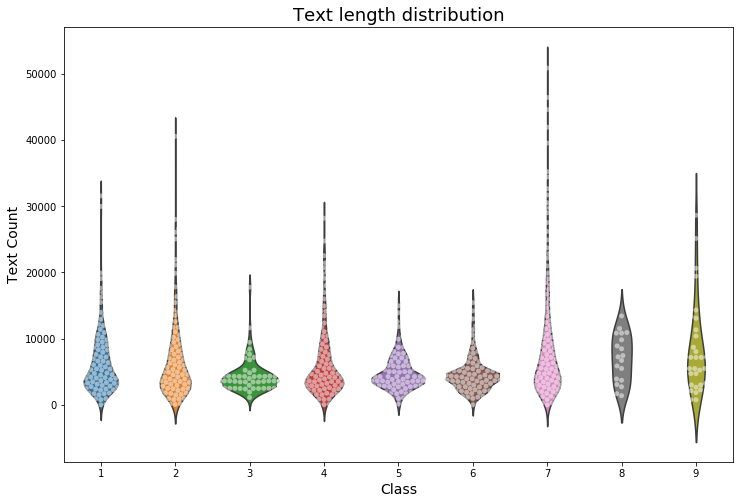

In [15]:
plt.figure(figsize=(12,8))
gene_count_grp = Data_full.groupby('Gene')["Text_count"].sum().reset_index()
sns.violinplot(x="Class", y="Text_count", data=Data_full, inner=None)
sns.swarmplot(x="Class", y="Text_count", data=Data_full, color="w", alpha=.5);
plt.ylabel('Text Count', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Text length distribution", fontsize=18)
plt.show()

In [19]:
y_true = Data_full['Class'].values
Data_full.Gene      = Data_full.Gene.str.replace('\s+', '_')
Data_full.Variation = Data_full.Variation.str.replace('\s+', '_')

## Distrubition of Gen mutation According to Class as Graphic

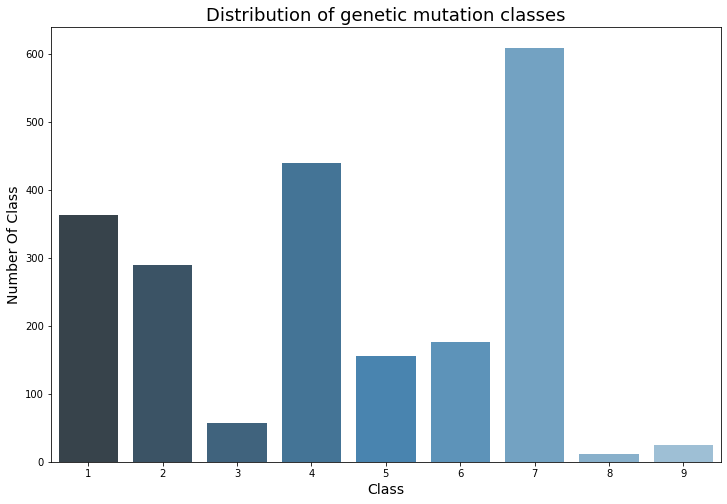

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=Data_full, palette="Blues_d")
plt.ylabel('Number Of Class', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()
#

## Distrubition Of gen mutation According to Class as Text

In [24]:
for i in range(1,10):
    df=train_df[Data_full.Class==i]
    print("Class=",i,"and shape=",df.shape)
    
#Class 1'e giren satır sayısı 568.
#Class 2'ye giren satır sayısı 452
#En fazla satır sayısı class 7'ye ait.

Class= 1 and shape= (363, 6)
Class= 2 and shape= (289, 6)
Class= 3 and shape= (57, 6)
Class= 4 and shape= (439, 6)
Class= 5 and shape= (155, 6)
Class= 6 and shape= (176, 6)
Class= 7 and shape= (609, 6)
Class= 8 and shape= (12, 6)
Class= 9 and shape= (24, 6)


## Distrubition Of Genes as Text

In [25]:
gene_group = Data_full.groupby("Gene")['Gene'].count()

minimal_occ_genes = gene_group.sort_values(ascending=True)[:10] #min ilk 10 geni alır.
print("Genes with maximal occurences\n", gene_group.sort_values(ascending=False)[:10]) #max ilk 10 geni yazar.


Genes with maximal occurences
 Gene
BRCA1     168
TP53      105
EGFR       90
PTEN       85
BRCA2      85
BRAF       68
KIT        65
PDGFRA     43
ALK        43
ERBB2      41
Name: Gene, dtype: int64


In [26]:
print("\nGenes with minimal occurences\n", minimal_occ_genes)


Genes with minimal occurences
 Gene
LATS1    1
NCOR1    1
MYOD1    1
MEN1     1
MDM2     1
MAPK1    1
KMT2D    1
KMT2B    1
KLF4     1
IL7R     1
Name: Gene, dtype: int64


## Her classtaki maksimum Çıkan İlk 7 Genin Grafiksel Gösterimi

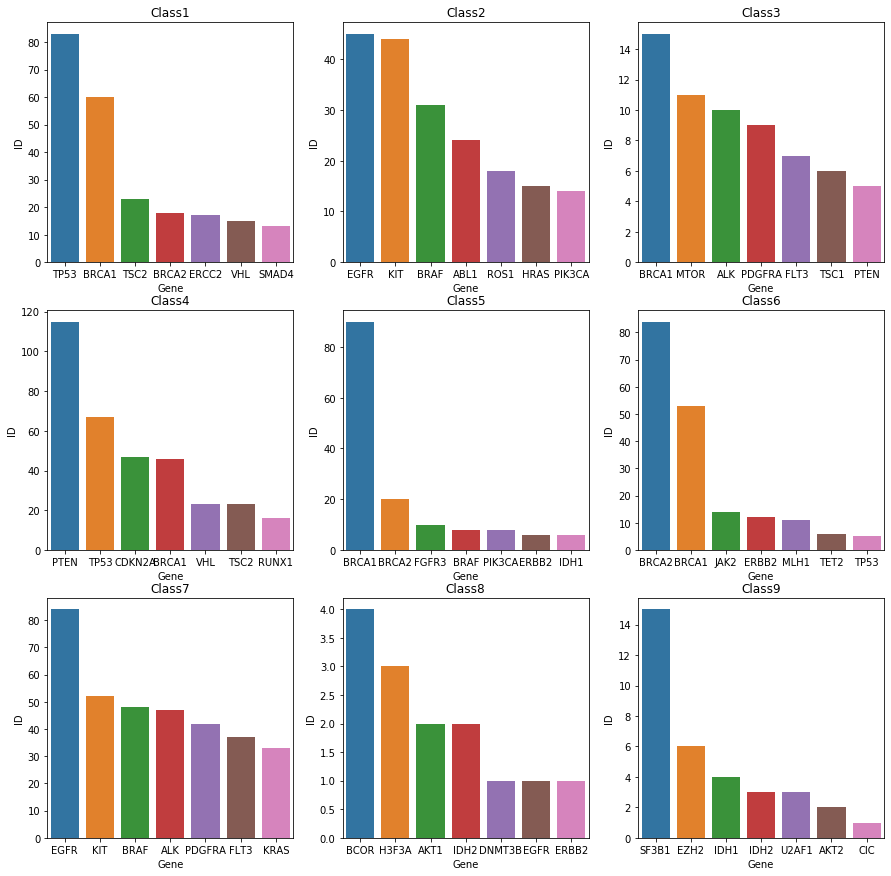

In [16]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        gene_count_grp = Data_full[Data_full["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        max_occurence_gen=gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = max_occurence_gen[:7]
        ax=sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_7, ax=axs[i][j])

        z=(i*3+j)+1
        ax.set(title ="Class"+str(z))
        # Class 1 için TP53 geni dominant
        # Class 2 için EGFR geni dominant
        # Class 3 için BRCA1 geni dominant
        # Class 7 için EGFR geni dominant


In [479]:
#gene_vectorizer = CountVectorizer()
#train_gene_feature_onehotCoding = gene_vectorizer.fit_transform((Data_full['Gene']))
Data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4762
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4620 non-null   float64
 1   Gene         4620 non-null   object 
 2   Variation    4620 non-null   object 
 3   Class        4620 non-null   float64
 4   TEXT         4620 non-null   object 
 5   cancer       4620 non-null   float64
 6   mutation     4620 non-null   float64
 7   cell         4620 non-null   float64
 8   type         4620 non-null   float64
 9   domain       4620 non-null   float64
 10  kinase       4620 non-null   float64
 11  tumors       4620 non-null   float64
 12  resistance   4620 non-null   float64
 13  brca1        4620 non-null   float64
 14  disease      4620 non-null   float64
 15  inhibitors   4620 non-null   float64
 16  treatment    4620 non-null   float64
 17  experiments  4620 non-null   float64
 18  mutants      4620 non-null   float64
 19  assay 

In [367]:
dd=Data_full.copy()

In [471]:
Df_freqwordx=pd.DataFrame()
sorted_freqword=pd.DataFrame()

def Finding_Freq_Word_InText(Class):
    Df_freqword=pd.DataFrame()
    global k
    wordfreq={}
    FilteredCLassdf=Data_full[Data_full['Class']==Class]
    
    for index, row in FilteredCLassdf.iterrows():
        wordlist=str(row['TEXT']).split()
        
        k+=1
        for word in wordlist:
            count=wordfreq.get(word,0)
            wordfreq[word]=count+1
        Df_freqword.loc[k,'freq']=wordfreq[word]
           
        for word in wordlist:
            count2=wordfreq.get(word,0)
            wordfreq[word]=count2+1
        Df_freqword.loc[k,'word']=word
        
        Df_freqword.loc[k,'Class']=Class
   
    Df_freqword_new=Df_freqword.groupby('word').max().reset_index()##Aynı word için birden fazla satırda gelen frequence'lardan max'ını alır.
    Df_freqword_sorted=Df_freqword_new.sort_values(by='freq', ascending=False).head(5) 
    return Df_freqword_sorted   


for i in range(1,10):
    Df_freqwordx=Df_freqwordx.append(Finding_Freq_Word_InText(i))

print(Df_freqwordx)


            word     freq  Class
27        cancer  35379.0    1.0
134     mutation  31996.0    1.0
34          cell  28553.0    1.0
231         type  23125.0    1.0
67        domain  22453.0    1.0
27        cancer  26520.0    2.0
95        kinase  24933.0    2.0
114     mutation  22484.0    2.0
202       tumors  17283.0    2.0
159   resistance  12743.0    2.0
5          brca1   5520.0    3.0
10       disease    807.0    3.0
17    inhibitors    668.0    3.0
32     treatment    575.0    3.0
11   experiments    517.0    3.0
25         brca1  35272.0    4.0
27        cancer  33116.0    4.0
133     mutation  28095.0    4.0
132      mutants  16807.0    4.0
18         assay  14209.0    4.0
79      variants  28475.0    5.0
11         brca1  25884.0    5.0
12        cancer  15762.0    5.0
42       neutral   6526.0    5.0
56      proteins   3378.0    5.0
73      variants  22775.0    6.0
7          brca1  18497.0    6.0
42      mutation  13365.0    6.0
53    resistance   6912.0    6.0
10        

In [274]:
Data_full[Data_full['word'].notnull() & Data_full['Class']==1]

,ID,Gene,Variation,Class,TEXT,word
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...,
3,3,CBL,N454D,3,recent evidence demonstrated that acquired uni...,
6,6,CBL,V430M,5,oncogenic mutations monomeric casitas lineage ...,
7,7,CBL,Deletion,1,negative regulator activated receptor tyrosine...,
14,14,CBL,P428L,5,oncogenic mutations monomeric casitas lineage ...,
...,...,...,...,...,...,...
3308,3308,RUNX1,R174*,7,familial platelet disorder with propensity acu...,
3309,3309,RUNX1,D171G,1,fusion protein generated chronic myeloid leuke...,
3310,3310,RUNX1,Amplification,7,runx proteins belong family metazoan transcrip...,
3317,3317,RUNX1,A122*,1,introduction myelodysplastic syndromes heterog...,


In [473]:
ddc=Data_full.copy()
#Her classtaki en sık geçen 5 kelime Finding_Freq_Word_InText metoduyla bulunmuştu.
# Her satırdaki Text kolonunda ilgili classta en sık geçen 5 kelimenin kaç tane olduğu bulundu.

def assign_columns_toFrequence(classx):
    k=0
    for index,rows in Df_freqwordx[Df_freqwordx['Class']==classx].iterrows():#frequence
        words=rows['word']
        
        for index,rows in dd[ddk['Class']==classx].iterrows():
            count=0
            for word in str(rows['TEXT']).split():
                if words == word:
                    count+=1
                    Data_full.loc[k,words]=count #datafull olmalı
            k+=1  
            
for i in range(1,9):
    assign_columns_toFrequence(i)
    
Data_full=Data_full.replace(np.nan, 0)
print(Data_full)

       ID    Gene             Variation  Class  \
0     0.0  FAM58A  Truncating Mutations    1.0   
1     1.0     CBL                 W802*    2.0   
2     2.0     CBL                 Q249E    2.0   
3     3.0     CBL                 N454D    3.0   
4     4.0     CBL                 L399V    4.0   
...   ...     ...                   ...    ...   
4753  0.0       0                     0    0.0   
4755  0.0       0                     0    0.0   
4756  0.0       0                     0    0.0   
4757  0.0       0                     0    0.0   
4762  0.0       0                     0    0.0   

                                                   TEXT  cancer  mutation  \
0     cyclin dependent kinases cdks regulate variety...    32.0       0.0   
1     abstract background small cell lung cancer nsc...    32.0       0.0   
2     abstract background small cell lung cancer nsc...    60.0       0.0   
3     recent evidence demonstrated acquired uniparen...     1.0       0.0   
4     oncogeni

In [463]:
Data_full[(Data_full['ID']==0)]
#Data_full[Data_full=]

,ID,Gene,Variation,Class,TEXT,Text_count,cancer,mutation,cell,type,...,treatment,data,activity,variants,neutral,human,idh1,phenotype,leiomyomas,1995
0,0.0,FAM58A,Truncating Mutations,1.0,cyclin dependent kinases cdks regulate variety...,3213.0,32.0,0.0,65.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0
3321,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3322,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3323,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3324,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4755,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4756,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4757,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

Number of data points in class 1 : 609 ( 28.672 %)
Number of data points in class 2 : 439 ( 20.669 %)
Number of data points in class 3 : 363 ( 17.09 %)
Number of data points in class 4 : 289 ( 13.606 %)
Number of data points in class 5 : 176 ( 8.286 %)
Number of data points in class 6 : 155 ( 7.298 %)
Number of data points in class 7 : 57 ( 2.684 %)
Number of data points in class 8 : 24 ( 1.13 %)
Number of data points in class 9 : 12 ( 0.565 %)


## TRAIN TEST SPLITING

In [359]:
# Splitting the data into train and test set 
X_train, test_df, y_train, y_test = train_test_split(Data_full, y_true, stratify=y_true, test_size=0.2)
# split the train data now into train validation and cross validation
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [362]:
train_df

,index,ID,Gene,Variation,Class,TEXT,Text_count
0,1316,1316,MLH1,G67R,1,order assess whether variations affecting mism...,2974.0
1,3017,3017,KIT,V560D,7,amplifications mutations proto oncogene subset...,20590.0
2,1011,1011,TSC2,G1567D,1,tuberous sclerosis complex autosomal dominant ...,3358.0
3,528,528,TP53,L145R,4,mutations tumor suppressor most frequently obs...,3133.0
4,289,289,BRD4,BRD4-NUT_Fusion,7,midline carcinoma genetically distinct subtype...,16148.0
...,...,...,...,...,...,...,...
2119,2175,2175,PTEN,D162H,4,diffuse large cell lymphoma dlbcl represents h...,2505.0
2120,837,837,ABL1,BCR-ABL1_Fusion,7,oncogene generated philadelphia chromosome tra...,5814.0
2121,3106,3106,DNMT3A,Deletion,1,genetic alterations responsible adverse outcom...,4853.0
2122,2546,2546,BRCA1,S1486C,5,mutations brca1 brca2 account majority heredit...,4274.0


In [346]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


In [351]:
train_class_distribution = train_df['Class'].value_counts()
test_class_distribution = test_df['Class'].value_counts()
cv_class_distribution = cv_df['Class'].value_counts()

In [182]:
test_class_distribution

7    191
4    137
1    114
2     91
6     55
5     48
3     18
9      7
8      4
Name: Class, dtype: int64

In [183]:
cv_class_distribution

7    153
4    110
1     91
2     72
6     44
5     39
3     14
9      6
8      3
Name: Class, dtype: int64

In [187]:
train_df

,ID,Gene,Variation,Class,TEXT,Text_count
2524,2524,BRCA1,E1836K,1,genetic screening breast ovarian cancer suscep...,3421.0
1020,1020,TSC2,E1552del,4,tuberous sclerosis complex autosomal dominant ...,3358.0
2396,2396,NF1,R1391S,4,interacts directly with catalytic subunit phos...,19825.0
2256,2256,PTEN,V343L,4,pten phosphatase tensin homolog phosphatase un...,4297.0
2316,2316,JAK1,S729C,7,hepatocellular carcinoma most deadly cancers w...,3159.0
...,...,...,...,...,...,...
206,206,EGFR,L747_T751del,7,somatic mutations introduced into epidermal gr...,14975.0
21,21,CBL,C396R,4,oncogenic mutations monomeric casitas lineage ...,3881.0
3254,3254,CASP8,CASP8L,4,caspase associating protein with death domain ...,11824.0
1607,1607,VHL,I151S,1,eukaryotic chaperonin tric mediates folding es...,9260.0
